<a href="https://colab.research.google.com/github/CeaPanochka/NNandMnADIP/blob/main/%D0%A6%D1%8B%D0%B1%D1%83%D0%BB%D0%B0%D0%B5%D0%B2_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B8%D0%B7_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0_CIFAR_100%2C_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_BatchNormalization()_%D0%B8_Dropout()_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [ ]:
# Ваш код
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from pylab import rcParams
from keras.datasets import cifar100
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train = X_train/ 255.0

In [ ]:
X_test = X_test/ 255.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

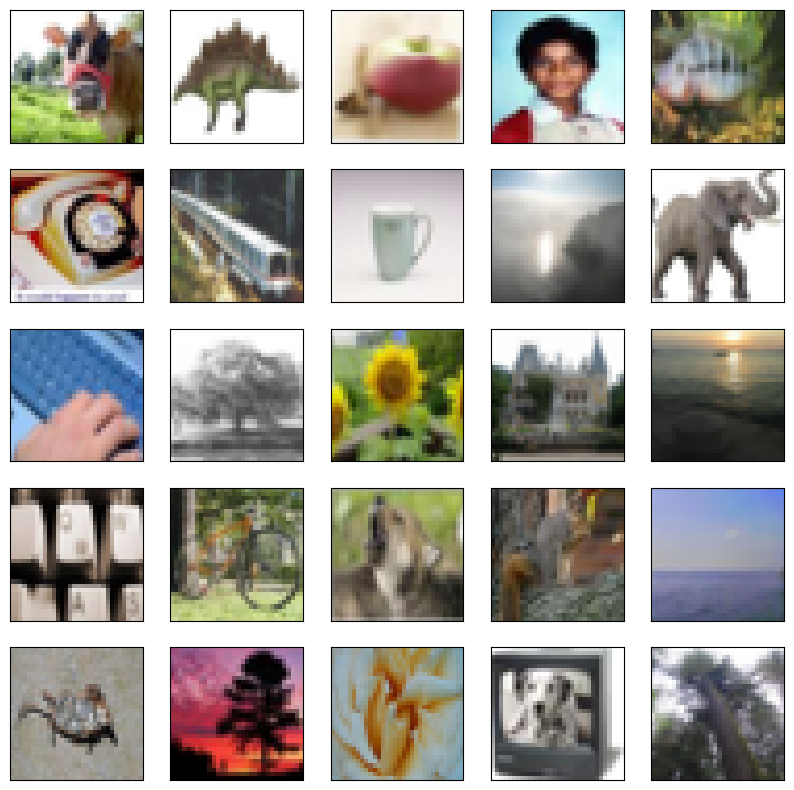

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [ ]:
# Ваш код

model_1 = Sequential()
model_1.add(Conv2D(32, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3,3), activation="relu"))
model_1.add(Flatten())
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(100, activation="softmax"))
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 5

Обучите созданную модель

In [ ]:
# Ваш код
model_1_history = model_1.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/5
391/391 [==============================] - 81s 204ms/step - loss: 4.1471 - accuracy: 0.0685 - val_loss: 3.7714 - val_accuracy: 0.1232
Epoch 2/5
391/391 [==============================] - 79s 203ms/step - loss: 3.5707 - accuracy: 0.1576 - val_loss: 3.4183 - val_accuracy: 0.1787
Epoch 3/5
391/391 [==============================] - 75s 191ms/step - loss: 3.2516 - accuracy: 0.2129 - val_loss: 3.1361 - val_accuracy: 0.2374
Epoch 4/5
391/391 [==============================] - 78s 200ms/step - loss: 3.0453 - accuracy: 0.2491 - val_loss: 3.0158 - val_accuracy: 0.2584
Epoch 5/5
391/391 [==============================] - 78s 199ms/step - loss: 2.9084 - accuracy: 0.2770 - val_loss: 2.9018 - val_accuracy: 0.2844


### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [ ]:
# Ваш код
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation("relu"))
model_2.add(Dense(100))
model_2.add(BatchNormalization())
model_2.add(Activation("softmax"))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
# Ваш код
model_2_history = model_2.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/5
391/391 [==============================] - 84s 211ms/step - loss: 3.8456 - accuracy: 0.1397 - val_loss: 3.7150 - val_accuracy: 0.1727
Epoch 2/5
391/391 [==============================] - 78s 200ms/step - loss: 3.1588 - accuracy: 0.2636 - val_loss: 3.1018 - val_accuracy: 0.2649
Epoch 3/5
391/391 [==============================] - 83s 212ms/step - loss: 2.8451 - accuracy: 0.3202 - val_loss: 3.1035 - val_accuracy: 0.2574
Epoch 4/5
391/391 [==============================] - 80s 205ms/step - loss: 2.6383 - accuracy: 0.3566 - val_loss: 2.9747 - val_accuracy: 0.2803
Epoch 5/5
391/391 [==============================] - 85s 217ms/step - loss: 2.4806 - accuracy: 0.3872 - val_loss: 2.6991 - val_accuracy: 0.3239


### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [ ]:
# Ваш код
model_3 = Sequential()
model_3.add(Conv2D(32, (3,3), activation="relu"))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3,3), activation="relu"))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3,3), activation="relu"))
model_3.add(Flatten())
model_3.add(Dense(64))
model_3.add(Activation("relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(100))
model_3.add(Activation("softmax"))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
# Ваш код
model_3_history = model_3.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=15,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/15
391/391 [==============================] - 90s 228ms/step - loss: 4.3447 - accuracy: 0.0405 - val_loss: 3.9316 - val_accuracy: 0.1077
Epoch 2/15
391/391 [==============================] - 96s 247ms/step - loss: 3.9449 - accuracy: 0.0896 - val_loss: 3.6630 - val_accuracy: 0.1480
Epoch 3/15
391/391 [==============================] - 83s 211ms/step - loss: 3.7281 - accuracy: 0.1206 - val_loss: 3.4679 - val_accuracy: 0.1840
Epoch 4/15
391/391 [==============================] - 79s 202ms/step - loss: 3.5983 - accuracy: 0.1417 - val_loss: 3.2998 - val_accuracy: 0.2047
Epoch 5/15
391/391 [==============================] - 77s 198ms/step - loss: 3.5010 - accuracy: 0.1559 - val_loss: 3.2352 - val_accuracy: 0.2252
Epoch 6/15
391/391 [==============================] - 78s 199ms/step - loss: 3.4148 - accuracy: 0.1709 - val_loss: 3.1364 - val_accuracy: 0.2424
Epoch 7/15
391/391 [==============================] - 76s 195ms/step - loss: 3.3599 - accuracy: 0.1808 - val_loss: 3.1023 - val_ac

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [ ]:
# Ваш код
model_4 = Sequential()
model_4.add(Conv2D(32, (3,3), activation="relu"))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Conv2D(64, (3,3), activation="relu"))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Conv2D(64, (3,3), activation="relu"))
model_4.add(Flatten())
model_4.add(Dense(64))
model_4.add(BatchNormalization())
model_4.add(Activation("relu"))
model_4.add(Dropout(0.5))
model_4.add(Dense(100))
model_4.add(Activation("softmax"))

In [ ]:
model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
# Ваш код
model_4_history = model_4.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=15,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/15
391/391 [==============================] - 83s 208ms/step - loss: 4.1920 - accuracy: 0.0659 - val_loss: 4.0217 - val_accuracy: 0.0982
Epoch 2/15
391/391 [==============================] - 77s 196ms/step - loss: 3.7013 - accuracy: 0.1274 - val_loss: 3.5132 - val_accuracy: 0.1653
Epoch 3/15
391/391 [==============================] - 75s 193ms/step - loss: 3.4600 - accuracy: 0.1659 - val_loss: 3.3706 - val_accuracy: 0.1834
Epoch 4/15
391/391 [==============================] - 75s 190ms/step - loss: 3.3110 - accuracy: 0.1910 - val_loss: 3.0493 - val_accuracy: 0.2518
Epoch 5/15
391/391 [==============================] - 77s 196ms/step - loss: 3.1884 - accuracy: 0.2111 - val_loss: 3.3945 - val_accuracy: 0.1941
Epoch 6/15
391/391 [==============================] - 75s 193ms/step - loss: 3.1119 - accuracy: 0.2273 - val_loss: 3.0131 - val_accuracy: 0.2538
Epoch 7/15
391/391 [==============================] - 76s 195ms/step - loss: 3.0448 - accuracy: 0.2401 - val_loss: 2.8364 - val_ac

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

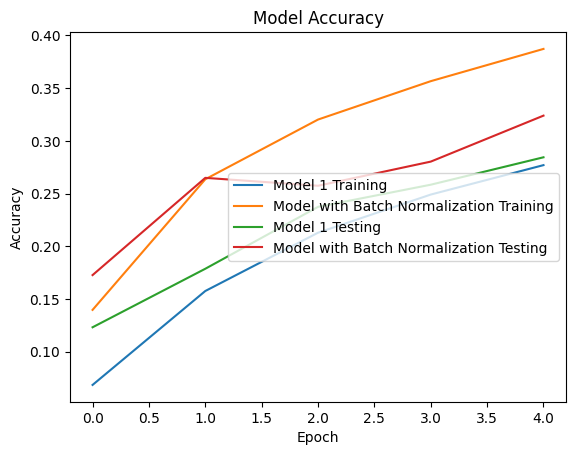

In [ ]:
# Ваш код
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Training','Model with Batch Normalization Training', 
            'Model 1 Testing', 'Model with Batch Normalization Testing'],
           loc='center right')

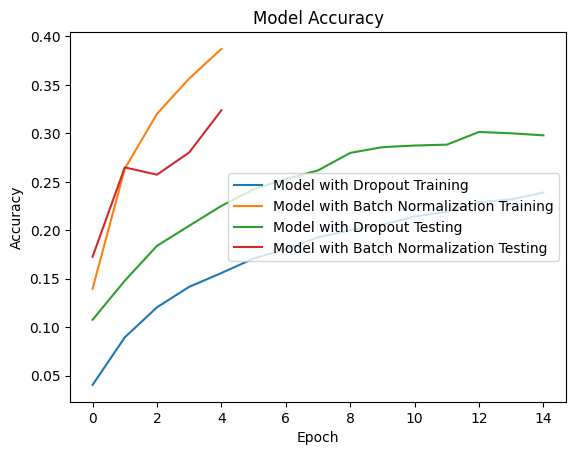

In [ ]:
plt.plot(model_3_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_3_history.history['val_accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with Dropout Training','Model with Batch Normalization Training', 
            'Model with Dropout Testing', 'Model with Batch Normalization Testing'],
           loc='center right')

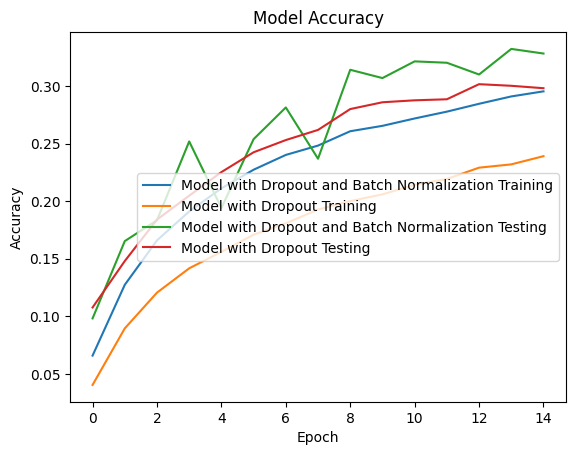

In [ ]:
plt.plot(model_4_history.history['accuracy'])
plt.plot(model_3_history.history['accuracy'])
plt.plot(model_4_history.history['val_accuracy'])
plt.plot(model_3_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with Dropout and Batch Normalization Training','Model with Dropout Training', 
            'Model with Dropout and Batch Normalization Testing', 'Model with Dropout Testing'],
           loc='center right')

Ваши выводы

Большей точности достигла модель с Batch Normalization и Dropout, однако, в ходе обучения график валидации получился рваным.

### Ваш итог

Для нормализации данных лучше использовать какой-то один из методов. В данной проверке лучше всего себя показал метод Batch Normalization